In [45]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Magic function to render matplotlib graphs in jupyter notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Always make good looking plots!
plt.style.use('ggplot')

In [3]:
# Reading the data
data = pd.read_csv("data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Filling up missing values with the mean
data = data.fillna(data["total_bedrooms"].mean())
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

**Q1. What is the mode of the column `ocean_proximity`?**

In [8]:
data["ocean_proximity"].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

**Q2. Which two variables are highly correlated according to their correlation coefficient?**

In [9]:
# Creating the correlation matrix
corr_matrix = data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.076231,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.092352,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.130709,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.133798,-0.180316,-0.024581
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.001535,0.069660,-0.028354
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.005063,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.080598,0.027430,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.326895,-0.511031,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.220049,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001535,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.347501,-0.004852


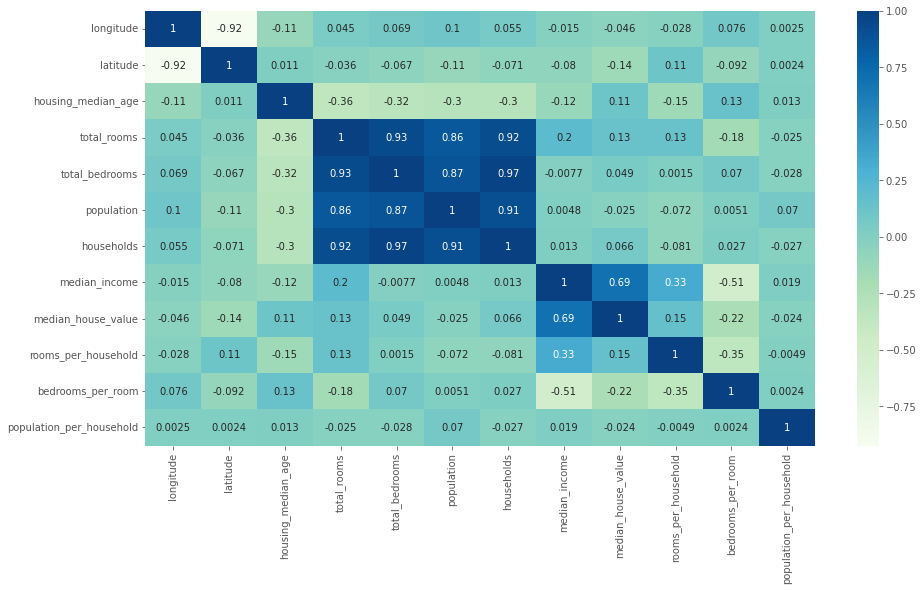

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu")
plt.show()

In [11]:
avg_house_value = data["median_house_value"].mean()
data["above_average"] = data["median_house_value"].apply(lambda x: 1 if x > avg_house_value else 0)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


In [12]:
# Splitting data into training and testing subsets
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

# Splitting data into training, validation and testing subsets
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [13]:
# Resetting subset indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# Defining target variables
y_train = df_train["above_average"].values
y_val = df_val["above_average"].values
y_test = df_test["above_average"].values

In [15]:
# Deleting target variables from subsets to avoid perfect fitting
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

**Q3. Calculate the** *mutual information score* **between `above_average` and `ocean_proximity`. Use the training dataset only. Round it to two decimals. What is their** *mutual information score* **?**

In [16]:
def calculate_mis(series):
    return mutual_info_score(series, df_train["above_average"])

df_mis = df_train[["ocean_proximity"]].apply(calculate_mis)
df_mis = df_mis.sort_values(ascending=False).to_frame(name="MI")
df_mis

,MI
ocean_proximity,0.101384


**Q4. Calculate the accuracy on the validation dataset and round it to 2 decimal digits.**

In [30]:
categorical = ["ocean_proximity"]
numerical = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room',
    'population_per_household'
]

# One-Hot-Encoding
train_dict = df_train[categorical + numerical].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [31]:
# Training the model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [32]:
# Validating the model
val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

In [34]:
# Calculating the accuracy
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
accuracy

0.84

**Q5. Which one is the least useful feature?**

In [35]:
# Feature elimination
features = categorical + numerical
features

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [36]:
original_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, original_score - score, score)

ocean_proximity 0.019505813953488382 0.8204941860465116
longitude 0.007151162790697607 0.8328488372093024
latitude 0.005697674418604581 0.8343023255813954
housing_median_age 0.008362403100775184 0.8316375968992248
total_rooms 0.0018217054263565124 0.8381782945736435
total_bedrooms 0.0042441860465115555 0.8357558139534884
population 0.013691860465116279 0.8263081395348837
households 0.006666666666666599 0.8333333333333334
median_income 0.053420542635658874 0.7865794573643411
rooms_per_household 0.0042441860465115555 0.8357558139534884
bedrooms_per_room 0.0032751937984495383 0.8367248062015504
population_per_household 0.003759689922480547 0.8362403100775194


The least useful feature with the smallest difference is the `total_rooms` variable.

**Q6. Regularization: Which one of the alphas leads to the best RMSE on the validation set? Round the RMSE score to 3 decimal digits**

In [38]:
# Normalizing the data
data["median_house_value"] = np.log1p(data["median_house_value"])

In [39]:
# Splitting the dataset
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [40]:
# Preparing the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [41]:
y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values
y_test = df_test["median_house_value"].values

In [42]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

Ridge regression

In [43]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")

In [44]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)

In [47]:
r = [0, 0.01, 0.1, 1.0, 10.0]
for a in r:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_val, y_pred))

    print(f"alpha = {a}; RMSE = {np.round(score, 4)}")

alpha = 0; RMSE = 0.5241
alpha = 0.01; RMSE = 0.5241
alpha = 0.1; RMSE = 0.5241
alpha = 1.0; RMSE = 0.5241
alpha = 10.0; RMSE = 0.5241


There are no changes in the RMSE metric for each alpha regularization parameter.